Loading data from synthetic_starry_data_part_1.npz...
Available keys in loaded file: ['time', 'flux', 'y_coeffs', 'parameters', 'image']
Found 5 examples in the file.
Image data is present.

Visualizing 5 random examples...

--- Example 1/5 (Index: 2) ---
Parameters for this example:
  u1: 0.13826003972842515
  u2: 0.18216322122712716
  num_spots: 1
  spots:
    Spot 1: {'contrast': 0.4359407712830675, 'radius': 5.325876104328657, 'lat': 0.0, 'lon': -33.58473835216256}
  ro: 0.1507809383499269
  trajectory: {'xo_start': -1.6875544584849556, 'xo_end': 1.8581985498699214, 'yo_const': 0.0, 'zo_const': 1.0}


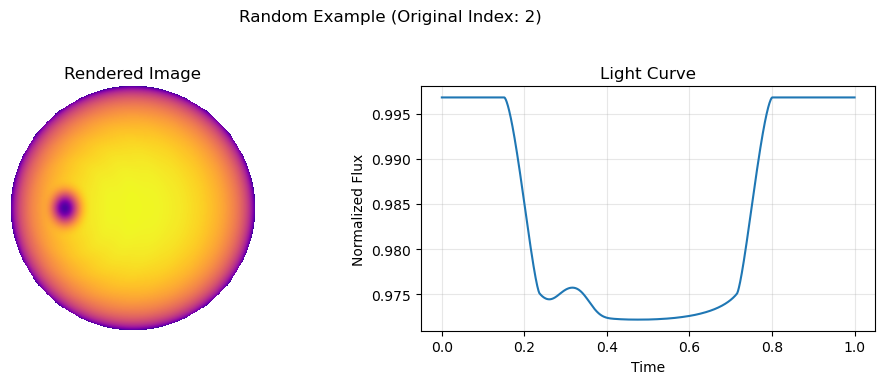


--- Example 2/5 (Index: 3) ---
Parameters for this example:
  u1: 0.197011572811955
  u2: 0.15255276900729028
  num_spots: 2
  spots:
    Spot 1: {'contrast': 0.7787631122081258, 'radius': 14.769164094939564, 'lat': 0.0, 'lon': -44.991075539547595}
    Spot 2: {'contrast': 0.32327254056090726, 'radius': 7.13557813393502, 'lat': 0.0, 'lon': 46.49839041708199}
  ro: 0.1625001970521639
  trajectory: {'xo_start': -1.8774849642116083, 'xo_end': 1.6400237058271316, 'yo_const': 0.0, 'zo_const': 1.0}


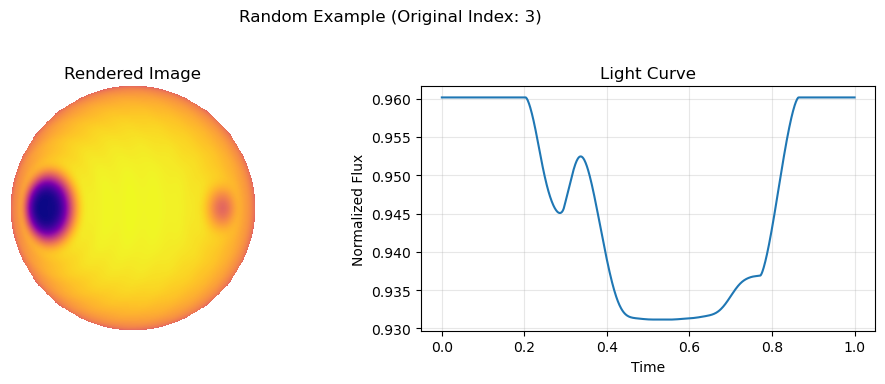


--- Example 3/5 (Index: 1) ---
Parameters for this example:
  u1: 0.263187246628813
  u2: 0.14343223865113552
  num_spots: 3
  spots:
    Spot 1: {'contrast': 0.35593650425623014, 'radius': 8.675354829556147, 'lat': 0.0, 'lon': -47.35275532640844}
    Spot 2: {'contrast': 0.4903943093173065, 'radius': 14.9701935346814, 'lat': 0.0, 'lon': 75.24375543678346}
    Spot 3: {'contrast': 0.550613668951675, 'radius': 5.325937437442145, 'lat': 0.0, 'lon': 24.492392090110883}
  ro: 0.1453457927845495
  trajectory: {'xo_start': -1.869946459552578, 'xo_end': 1.968175916078651, 'yo_const': 0.0, 'zo_const': 1.0}


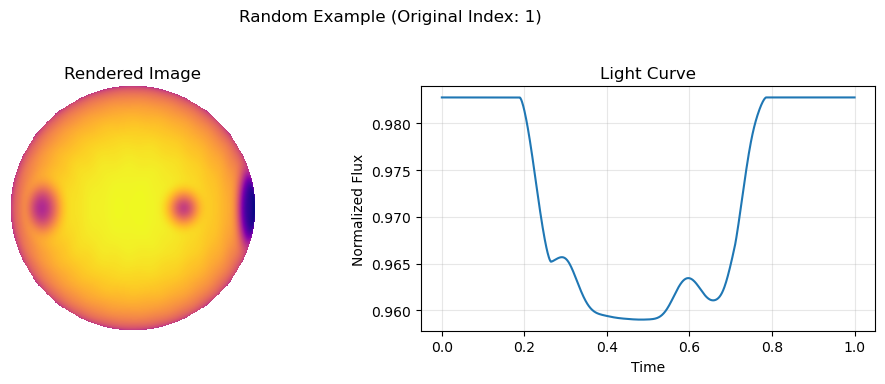


--- Example 4/5 (Index: 4) ---
Parameters for this example:
  u1: 0.23698851635462576
  u2: 0.12407971613719082
  num_spots: 3
  spots:
    Spot 1: {'contrast': 0.3977476227458877, 'radius': 11.876354381995105, 'lat': 0.0, 'lon': -85.80908963100936}
    Spot 2: {'contrast': 0.3089579452769483, 'radius': 7.724683948068436, 'lat': 0.0, 'lon': 18.578753858485626}
    Spot 3: {'contrast': 0.5034145168680276, 'radius': 14.900285546414107, 'lat': 0.0, 'lon': 41.702022207059116}
  ro: 0.2871199104463414
  trajectory: {'xo_start': -1.6133345566860156, 'xo_end': 1.6690628208799638, 'yo_const': 0.0, 'zo_const': 1.0}


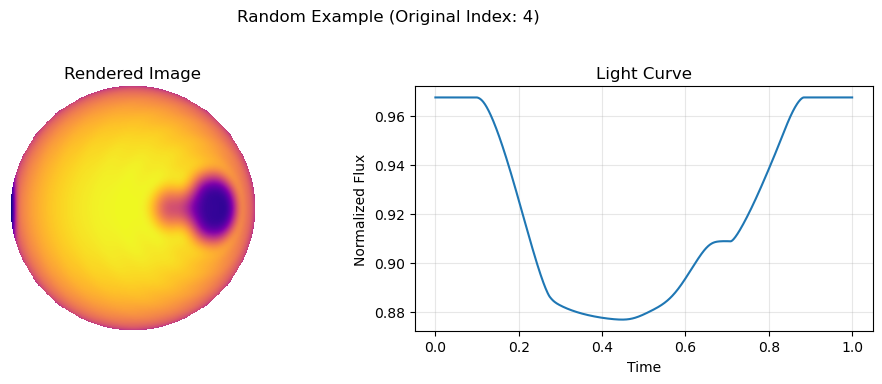


--- Example 5/5 (Index: 0) ---
Parameters for this example:
  u1: 0.16286313420942028
  u2: 0.14745268841251324
  num_spots: 2
  spots:
    Spot 1: {'contrast': 0.6027532694716322, 'radius': 12.620644476176594, 'lat': 0.0, 'lon': -2.5743560948814377}
    Spot 2: {'contrast': 0.3881201632308027, 'radius': 13.387216102949566, 'lat': 0.0, 'lon': 76.91172803660655}
  ro: 0.08927486168017833
  trajectory: {'xo_start': -1.97391402359777, 'xo_end': 1.9571890875458118, 'yo_const': 0.0, 'zo_const': 1.0}


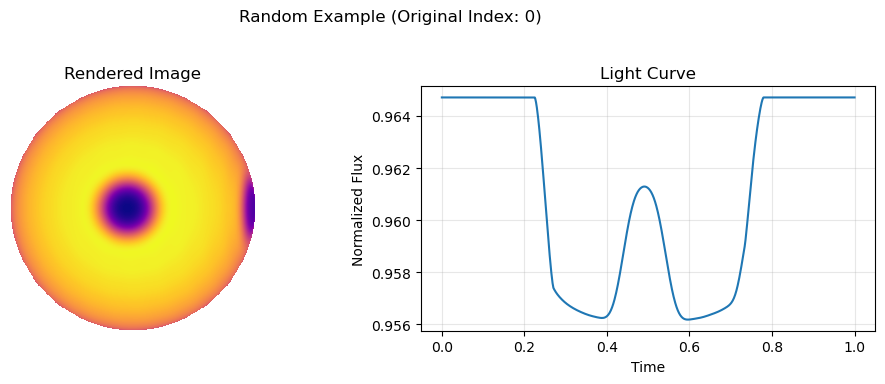


Finished visualizing examples.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os # Optional: To check if file exists

# --- Configuration ---
NPZ_FILENAME = "synthetic_starry_data_part_1.npz"  # The file saved by the previous script
N_VISUALIZE = 5                             # How many examples to show

# --- Check if file exists ---
if not os.path.exists(NPZ_FILENAME):
    print(f"Error: File not found at '{NPZ_FILENAME}'")
    print("Please ensure the generation script ran successfully and saved the file.")
    exit()

# --- Load the data ---
print(f"Loading data from {NPZ_FILENAME}...")
# allow_pickle=True is necessary because the 'parameters' array contains Python objects (dictionaries)
try:
    loaded_data = np.load(NPZ_FILENAME, allow_pickle=True)
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

print("Available keys in loaded file:", list(loaded_data.keys()))

# --- Get basic info ---
# Check essential keys are present
required_keys = ['time', 'flux', 'parameters']
if not all(key in loaded_data for key in required_keys):
     print(f"Error: The loaded file is missing one or more required keys: {required_keys}")
     loaded_data.close()
     exit()

total_examples = len(loaded_data['flux'])
print(f"Found {total_examples} examples in the file.")

# Check if image data exists
has_images = 'image' in loaded_data.keys()
if has_images:
    print("Image data is present.")
else:
    print("Image data is not present in the file.")

# Adjust N_VISUALIZE if requesting more than available
if N_VISUALIZE > total_examples:
    print(f"Warning: Requested {N_VISUALIZE} examples, but only {total_examples} are available. Visualizing all.")
    N_VISUALIZE = total_examples
elif N_VISUALIZE <= 0:
     print("N_VISUALIZE must be greater than 0.")
     loaded_data.close()
     exit()


# --- Select random indices ---
# Ensure unique indices if N_VISUALIZE < total_examples
if total_examples > 0:
    random_indices = random.sample(range(total_examples), N_VISUALIZE)
else:
    print("No examples to visualize.")
    loaded_data.close()
    exit()

print(f"\nVisualizing {N_VISUALIZE} random examples...")

# --- Loop and Plot ---
for i, idx in enumerate(random_indices):
    print(f"\n--- Example {i+1}/{N_VISUALIZE} (Index: {idx}) ---")

    # Extract data for the current index
    time_lc = loaded_data['time'][idx]
    flux = loaded_data['flux'][idx]
    params = loaded_data['parameters'][idx] # This is the dictionary

    print("Parameters for this example:")
    # Pretty print the parameters dictionary
    for key, value in params.items():
        if key == 'spots':
            print(f"  {key}:")
            for spot_num, spot_dict in enumerate(value):
                 print(f"    Spot {spot_num+1}: {spot_dict}")
        elif key == 'trajectory':
             print(f"  {key}: {value}")
        else:
            print(f"  {key}: {value}")


    # Create figure
    if has_images:
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        fig.suptitle(f"Random Example (Original Index: {idx})")

        # Plot Image
        img_array = loaded_data['image'][idx]
        if img_array is not None and not np.all(np.isnan(img_array)):
             axes[0].imshow(img_array, cmap='plasma', origin='lower', extent=(-1, 1, -1, 1))
             axes[0].set_title("Rendered Image")
             axes[0].axis('off')
        else:
             axes[0].text(0.5, 0.5, 'Image N/A\nor Invalid', ha='center', va='center')
             axes[0].set_title("Rendered Image")
             axes[0].axis('off')


        # Plot Light Curve
        axes[1].plot(time_lc, flux)
        axes[1].set_title("Light Curve")
        axes[1].set_xlabel("Time")
        axes[1].set_ylabel("Normalized Flux")
        axes[1].grid(True, alpha=0.3)

    else:
        # Only plot light curve if no images
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        fig.suptitle(f"Random Example (Original Index: {idx})")
        ax.plot(time_lc, flux)
        ax.set_title("Light Curve")
        ax.set_xlabel("Time")
        ax.set_ylabel("Normalized Flux")
        ax.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# --- Clean up ---
loaded_data.close()
print("\nFinished visualizing examples.")